In [1]:
import pickle
import pandas as pd 
import matplotlib as plt
import numpy as np
import seaborn as sns
import datetime

## Importing and previewing the Dataset

In [2]:
with open("DSML_SS19_Bike_Sharing_DataSet.pkl", "rb") as ds:
    data= pickle.load(ds)

In [3]:
data.head()

BOOKING_HAL_ID  VEHICLE_HAL_ID                           CUSTOMER_HAL_ID  \
0        29433847          108784  00DC95D85FFA09ED51196794705BE94187D5AD3E   
1        29433749          119974  B405842BAAAF3E30D7F81E6ED5FA070BD8EAF0BF   
2        29433904          109899  F507D1ADD070527615165519625291F48CB9A27A   
3        29433803          110244  0FDFCE9473C19A5A0C3CEC3E7C06E9FCAA68F251   
4        29434100          119936  C40EB896C4D6CCCA992355297BD30D52110560A2   

         DATE_BOOKING           DATE_FROM          DATE_UNTIL  \
0 2015-05-01 00:14:11 2015-05-01 00:14:11 2015-05-01 00:27:27   
1 2015-05-01 00:02:13 2015-05-01 00:02:13 2015-05-01 00:22:14   
2 2015-05-01 00:18:39 2015-05-01 00:18:39 2015-05-01 00:32:56   
3 2015-05-01 00:08:10 2015-05-01 00:08:10 2015-05-01 00:17:52   
4 2015-05-01 00:41:19 2015-05-01 00:41:19 2015-05-01 01:06:29   

                         START_RENTAL_ZONE  START_RENTAL_ZONE_HAL_ID  \
0                 Reeperbahn / Königstraße                  131902.0   
1          Eduard-Rhein-Ufer / Schwanenwik                  140800.0   
2                         7400 Marienplatz                   62689.0   
3                                      NaN                    9889.0   
4  Bahnhof Dammtor Süd / Marseiller Straße                  138382.0   

                    END_RENTAL_ZONE  END_RENTAL_ZONE_HAL_ID CITY_RENTAL_ZONE  
0  Bahnhof Altona West / Busbahnhof                131889.0          Hamburg  
1  Eppendorfer Weg/Hoheluftchaussee                198086.0          Hamburg  
2                  7300 Bebelstraße                 62971.0        Stuttgart  
3                               NaN                     NaN             Köln  
4         Saarlandstraße/Wiesendamm                203890.0          Hamburg

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10712694 entries, 0 to 10712693
Data columns (total 11 columns):
BOOKING_HAL_ID              int64
VEHICLE_HAL_ID              int64
CUSTOMER_HAL_ID             object
DATE_BOOKING                datetime64[ns]
DATE_FROM                   datetime64[ns]
DATE_UNTIL                  datetime64[ns]
START_RENTAL_ZONE           object
START_RENTAL_ZONE_HAL_ID    float64
END_RENTAL_ZONE             object
END_RENTAL_ZONE_HAL_ID      float64
CITY_RENTAL_ZONE            object
dtypes: datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 899.0+ MB


In [5]:
data.describe()

BOOKING_HAL_ID  VEHICLE_HAL_ID  START_RENTAL_ZONE_HAL_ID  \
count    1.071269e+07    1.071269e+07              1.021177e+07   
mean     3.754545e+07    1.221826e+05              1.547608e+05   
std      4.726017e+06    1.747448e+04              7.607891e+04   
min      2.943373e+07    1.060020e+05              2.000000e+02   
25%      3.331497e+07    1.099360e+05              1.316410e+05   
50%      3.774884e+07    1.171990e+05              1.407990e+05   
75%      4.143619e+07    1.204350e+05              2.144450e+05   
max      4.596563e+07    1.776080e+05              2.720510e+05   

       END_RENTAL_ZONE_HAL_ID  
count            1.020737e+07  
mean             1.547201e+05  
std              7.613079e+04  
min              2.000000e+02  
25%              1.316410e+05  
50%              1.407990e+05  
75%              2.144450e+05  
max              2.720250e+05

## Creating a new Dataframe

Since our Group is focussing on the bike-rental-demand in Munich only, we create a new Dataframe that excludes instances recorded in other cities. Then, we reindex our new Dataframe, because otherwise the indices would still refer to where one instance was located in the "All-Cities" Dataset, which will most likely have no further relevance for us. 

In [6]:
dset = data.groupby('CITY_RENTAL_ZONE').get_group("München")

In [7]:
dset.head()

BOOKING_HAL_ID  VEHICLE_HAL_ID                           CUSTOMER_HAL_ID  \
15         29434075          107021  D0F36C1ABF3B608012F9F4D00D0EF8C6DA13801A   
40         29433981          107185  6DA7EBF532051C36DEEDC13BA58D5820C06CD099   
52         29434899          106863  9C5A3E80300107E4F867C9D0962FFD79FD724E02   
59         29434432          107524  264660C69328B2FAEF2E901D6E914D46AE648C4B   
145        29434530          107376  1C6F0D912526E8048420EECB89B87B2E664F91C8   

           DATE_BOOKING           DATE_FROM          DATE_UNTIL  \
15  2015-05-01 00:39:30 2015-05-01 00:39:30 2015-05-01 00:49:04   
40  2015-05-01 00:29:56 2015-05-01 00:29:56 2015-05-01 00:35:14   
52  2015-05-01 02:17:58 2015-05-01 02:17:58 2015-05-01 02:20:55   
59  2015-05-01 01:21:04 2015-05-01 01:21:04 2015-05-01 01:38:18   
145 2015-05-01 01:33:02 2015-05-01 01:33:02 2015-05-01 01:44:14   

    START_RENTAL_ZONE  START_RENTAL_ZONE_HAL_ID END_RENTAL_ZONE  \
15                NaN                    4322.0             NaN   
40                NaN                     323.0             NaN   
52                NaN                  117008.0             NaN   
59                NaN                  117008.0             NaN   
145               NaN                   14197.0             NaN   

     END_RENTAL_ZONE_HAL_ID CITY_RENTAL_ZONE  
15                  16141.0          München  
40                  43654.0          München  
52                   6746.0          München  
59                    437.0          München  
145                     NaN          München

In [8]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722056 entries, 15 to 10712662
Data columns (total 11 columns):
BOOKING_HAL_ID              722056 non-null int64
VEHICLE_HAL_ID              722056 non-null int64
CUSTOMER_HAL_ID             722056 non-null object
DATE_BOOKING                722056 non-null datetime64[ns]
DATE_FROM                   722056 non-null datetime64[ns]
DATE_UNTIL                  722056 non-null datetime64[ns]
START_RENTAL_ZONE           42814 non-null object
START_RENTAL_ZONE_HAL_ID    648019 non-null float64
END_RENTAL_ZONE             37053 non-null object
END_RENTAL_ZONE_HAL_ID      646853 non-null float64
CITY_RENTAL_ZONE            722056 non-null object
dtypes: datetime64[ns](3), float64(2), int64(2), object(4)
memory usage: 66.1+ MB


## NOTE:

We need to remember to take care of the null-values in START_RENTAL_ZONE, END_RENTAL_ZONE & their HAL_IDs later on !

In [9]:
dset = dset.drop(columns = 'CITY_RENTAL_ZONE')

In [10]:
dset.head()

BOOKING_HAL_ID  VEHICLE_HAL_ID                           CUSTOMER_HAL_ID  \
15         29434075          107021  D0F36C1ABF3B608012F9F4D00D0EF8C6DA13801A   
40         29433981          107185  6DA7EBF532051C36DEEDC13BA58D5820C06CD099   
52         29434899          106863  9C5A3E80300107E4F867C9D0962FFD79FD724E02   
59         29434432          107524  264660C69328B2FAEF2E901D6E914D46AE648C4B   
145        29434530          107376  1C6F0D912526E8048420EECB89B87B2E664F91C8   

           DATE_BOOKING           DATE_FROM          DATE_UNTIL  \
15  2015-05-01 00:39:30 2015-05-01 00:39:30 2015-05-01 00:49:04   
40  2015-05-01 00:29:56 2015-05-01 00:29:56 2015-05-01 00:35:14   
52  2015-05-01 02:17:58 2015-05-01 02:17:58 2015-05-01 02:20:55   
59  2015-05-01 01:21:04 2015-05-01 01:21:04 2015-05-01 01:38:18   
145 2015-05-01 01:33:02 2015-05-01 01:33:02 2015-05-01 01:44:14   

    START_RENTAL_ZONE  START_RENTAL_ZONE_HAL_ID END_RENTAL_ZONE  \
15                NaN                    4322.0             NaN   
40                NaN                     323.0             NaN   
52                NaN                  117008.0             NaN   
59                NaN                  117008.0             NaN   
145               NaN                   14197.0             NaN   

     END_RENTAL_ZONE_HAL_ID  
15                  16141.0  
40                  43654.0  
52                   6746.0  
59                    437.0  
145                     NaN

In [11]:
dset = dset.reset_index(drop = True)  # drop = True removes old index column 
dset.head()

BOOKING_HAL_ID  VEHICLE_HAL_ID                           CUSTOMER_HAL_ID  \
0        29434075          107021  D0F36C1ABF3B608012F9F4D00D0EF8C6DA13801A   
1        29433981          107185  6DA7EBF532051C36DEEDC13BA58D5820C06CD099   
2        29434899          106863  9C5A3E80300107E4F867C9D0962FFD79FD724E02   
3        29434432          107524  264660C69328B2FAEF2E901D6E914D46AE648C4B   
4        29434530          107376  1C6F0D912526E8048420EECB89B87B2E664F91C8   

         DATE_BOOKING           DATE_FROM          DATE_UNTIL  \
0 2015-05-01 00:39:30 2015-05-01 00:39:30 2015-05-01 00:49:04   
1 2015-05-01 00:29:56 2015-05-01 00:29:56 2015-05-01 00:35:14   
2 2015-05-01 02:17:58 2015-05-01 02:17:58 2015-05-01 02:20:55   
3 2015-05-01 01:21:04 2015-05-01 01:21:04 2015-05-01 01:38:18   
4 2015-05-01 01:33:02 2015-05-01 01:33:02 2015-05-01 01:44:14   

  START_RENTAL_ZONE  START_RENTAL_ZONE_HAL_ID END_RENTAL_ZONE  \
0               NaN                    4322.0             NaN   
1               NaN                     323.0             NaN   
2               NaN                  117008.0             NaN   
3               NaN                  117008.0             NaN   
4               NaN                   14197.0             NaN   

   END_RENTAL_ZONE_HAL_ID  
0                 16141.0  
1                 43654.0  
2                  6746.0  
3                   437.0  
4                     NaN

## Adding Weather Data

The hourly CDC Climate DataSet (for Germany) includes multiple different attributes:


* air_temperature
* cloud_type
* cloudiness
* precipitation
* pressure
* soil_temperature
* solar
* sun
* visibility
* wind


It is very likely that there is very little to no correlation between many of these attributes and the bike-rental demand.We decided to use air_temperature, cloudiness, precipitation, sun & wind for now. During DataExploration we will decide which ones we might simplify, remove or (together with one or multiple other attributes) aggregate into one object (e.g. a "weather" object could tell weather it is sunny, rainy, or cloudy). Before we can do that tough, we will have to manipulate the new datasets so that they fit the scheme of our bike-rental set. 

There are multiple different Weather Stations in Munich that recorded data over multiple years. To decide whose records will be the ones we use, we started by quickly having a look where exactly they are located (using Google Maps):

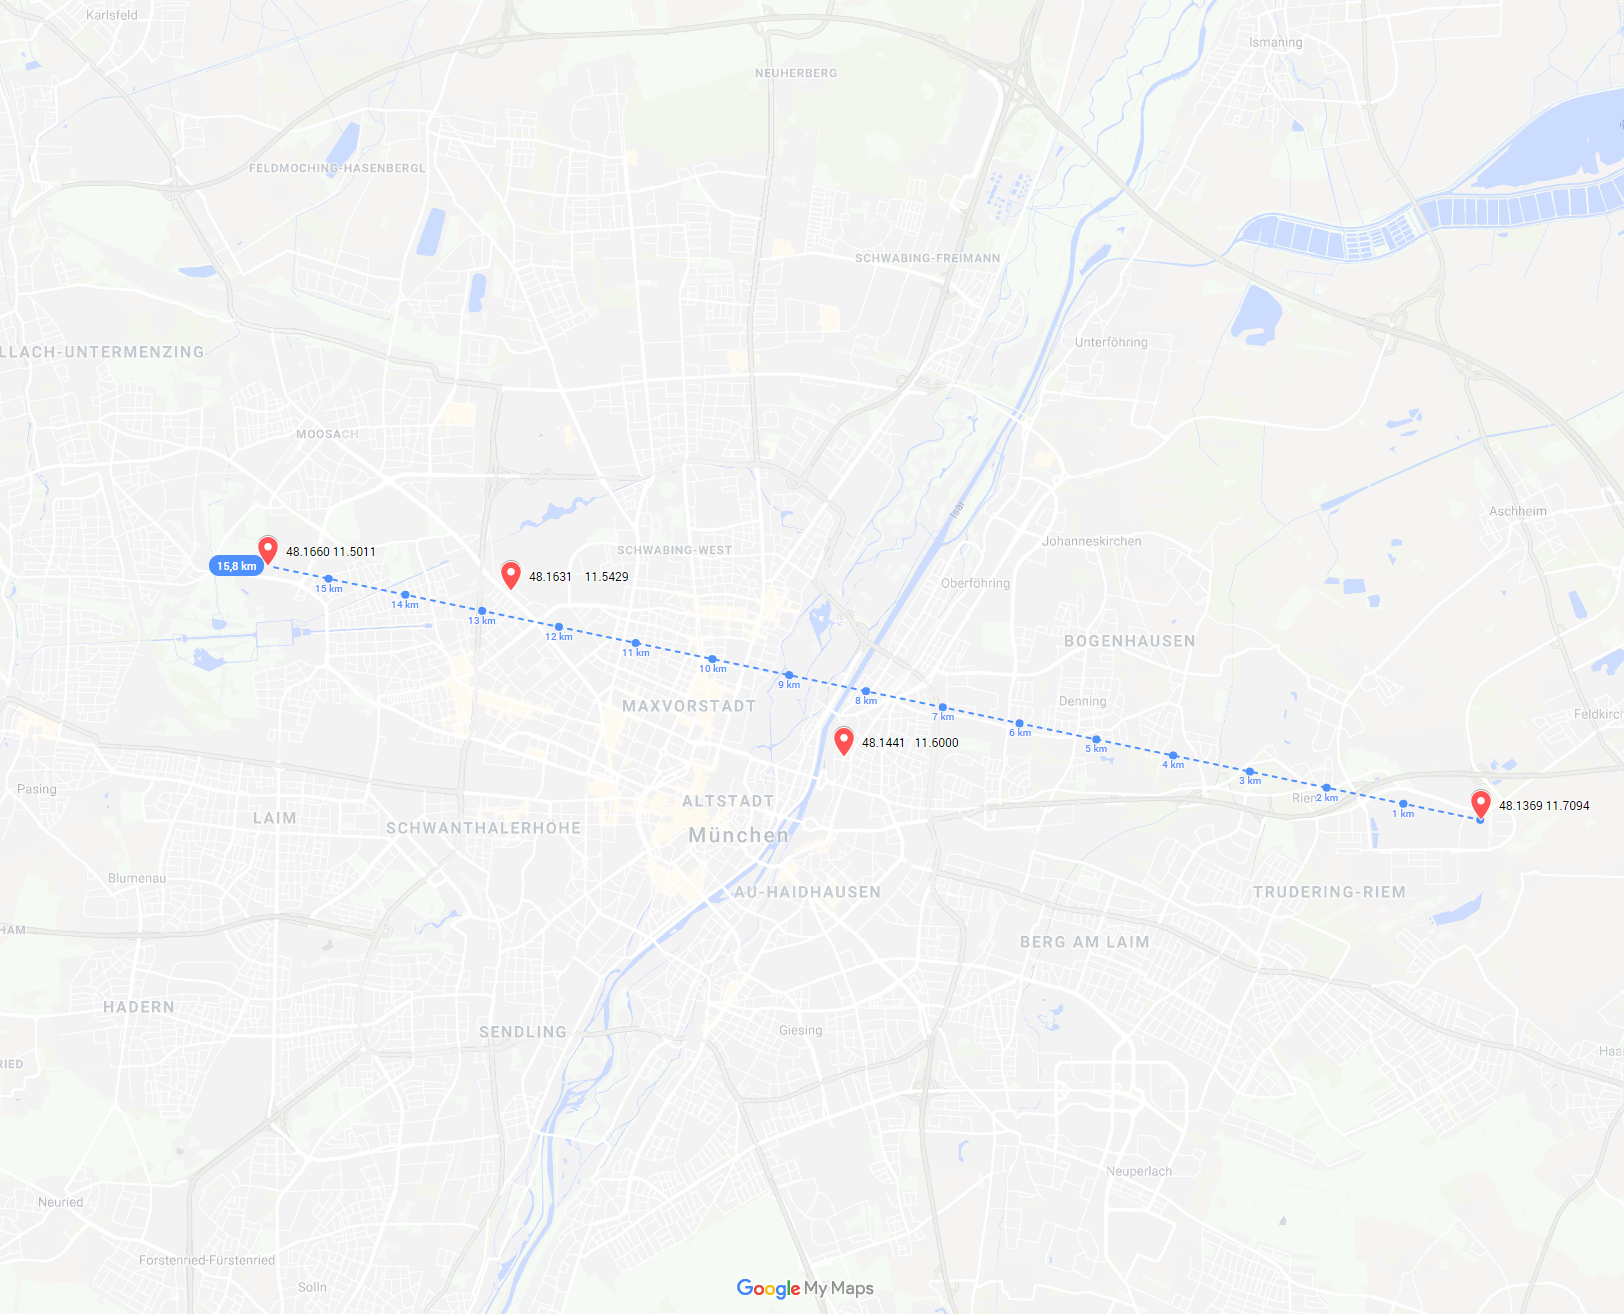

As the Stations that are the farthes away from one another are only ~16km apart, it is unlikely that there is a noticable amount of deviaition in between their records. For that reason we decicded that merging the records of the different Weather Stations (in order to get a more precise depiction of the over-all weather in Munich) would probably not be worth the effort in regards to possible outcomes.

With that in mind, the Weather Station located in the center would be the most reasonable one to pick:

* Station-Name: "München-Bogenhausen"
* Staiton-ID: 03382
* Duration-of-Recording: from 1948-01-01 to 1954-01-01
* Latitude: 48.1441
* Longitude: 11.600


Unfortunately the Station recorded Data more than half a century ago, so we had to pick a different station. 
On a second look, we noticed that two of the other Stations have been out of order for tens of years aswell. Therefor the only choice left was to use data from the Station located in "Schwabing West":

* Station-Name: "München-Stadt"
* Staiton-ID: 03379
* Duration-of-Recording: from 1997-07-01 to 2019-05-01
* Latitude: 48.1631
* Longitude: 11.5429

Since this Station is still located relatively close to our first choice, it should work just fine. 

After downloading the datasets, we need to cut out everything but the timeperiod of interest and merge it with our dataset. 

In [12]:
temperature = pd.read_csv(".\\Weather Data\\München-Stadt Wetterdaten (Stations-ID 03379)\\air-temperature\\stundenwerte_TU_03379_19970701_20181231_hist\\produkt_tu_stunde_19970701_20181231_03379.txt", sep = ";")
temperature.head()

STATIONS_ID  MESS_DATUM  QN_9  TT_TU  RF_TU  eor
0         3379  1997070101    10   12.8   80.0  eor
1         3379  1997070102    10   12.6   81.0  eor
2         3379  1997070103    10   12.4   81.0  eor
3         3379  1997070104    10   12.4   82.0  eor
4         3379  1997070105    10   12.3   80.0  eor

In [13]:
temperature["DATUM"] = pd.to_datetime(temperature["MESS_DATUM"].astype(str), format="%Y%m%d%H")
temperature = temperature.drop(columns = 'MESS_DATUM')
temperature.head()

STATIONS_ID  QN_9  TT_TU  RF_TU  eor               DATUM
0         3379    10   12.8   80.0  eor 1997-07-01 01:00:00
1         3379    10   12.6   81.0  eor 1997-07-01 02:00:00
2         3379    10   12.4   81.0  eor 1997-07-01 03:00:00
3         3379    10   12.4   82.0  eor 1997-07-01 04:00:00
4         3379    10   12.3   80.0  eor 1997-07-01 05:00:00

In [14]:
temperature = temperature.set_index("DATUM")

In [15]:
temperature = temperature.loc["2015-05-01":"2017-04-30"]

In [16]:
temperature.head()

STATIONS_ID  QN_9  TT_TU  RF_TU  eor
DATUM                                                    
2015-05-01 00:00:00         3379     3    8.6   87.0  eor
2015-05-01 01:00:00         3379     3    8.3   90.0  eor
2015-05-01 02:00:00         3379     3    8.2   91.0  eor
2015-05-01 03:00:00         3379     3    8.2   92.0  eor
2015-05-01 04:00:00         3379     3    8.2   91.0  eor

In [17]:
temperature = temperature.drop(columns = "eor")
temperature = temperature.drop(columns = "QN_9")
temperature = temperature.drop(columns = "STATIONS_ID")
temperature = temperature.rename(index=str, columns={"TT_TU":"TEMP(°C)", "RF_TU":"HUMIDITY(%)"})

In [18]:
temperature.head()

TEMP(°C)  HUMIDITY(%)
DATUM                                     
2015-05-01 00:00:00       8.6         87.0
2015-05-01 01:00:00       8.3         90.0
2015-05-01 02:00:00       8.2         91.0
2015-05-01 03:00:00       8.2         92.0
2015-05-01 04:00:00       8.2         91.0

# Same process for the cloudiness attribute:

In [19]:
cloudiness = pd.read_csv(".\\Weather Data\\München-Stadt Wetterdaten (Stations-ID 03379)\\cloudiness\\stundenwerte_N_03379_19790101_20181231_hist\\produkt_n_stunde_19790101_20181231_03379.txt", sep = ";")
cloudiness.head()

STATIONS_ID  MESS_DATUM  QN_8 V_N_I   V_N  eor
0         3379  1979010106     1     P     8  eor
1         3379  1979010118     1     P     8  eor
2         3379  1979010206     1     P     3  eor
3         3379  1979010218     1     P     1  eor
4         3379  1979010306     1     P     7  eor

In [20]:
cloudiness["DATUM"] = pd.to_datetime(cloudiness["MESS_DATUM"].astype(str), format="%Y%m%d%H")
cloudiness = cloudiness.drop(columns = 'MESS_DATUM')
cloudiness.head()

STATIONS_ID  QN_8 V_N_I   V_N  eor               DATUM
0         3379     1     P     8  eor 1979-01-01 06:00:00
1         3379     1     P     8  eor 1979-01-01 18:00:00
2         3379     1     P     3  eor 1979-01-02 06:00:00
3         3379     1     P     1  eor 1979-01-02 18:00:00
4         3379     1     P     7  eor 1979-01-03 06:00:00

In [21]:
cloudiness = cloudiness.set_index("DATUM")

In [22]:
cloudiness = cloudiness.loc["2015-05-01":"2017-04-30"]

In [23]:
cloudiness.head()

STATIONS_ID  QN_8 V_N_I   V_N  eor
DATUM                                                  
2015-05-01 00:00:00         3379     3     I     7  eor
2015-05-01 01:00:00         3379     3     I     8  eor
2015-05-01 02:00:00         3379     3     I     8  eor
2015-05-01 03:00:00         3379     3     I     7  eor
2015-05-01 04:00:00         3379     3     I     8  eor

In [24]:
cloudiness = cloudiness.drop(columns = "eor")
cloudiness = cloudiness.drop(columns = "STATIONS_ID")
cloudiness = cloudiness.drop(columns = "QN_8")
cloudiness = cloudiness.drop(columns = "V_N_I")

In [25]:
cloudiness = cloudiness.rename(columns={" V_N":"CLOUDINESS_1_TO_8"})
cloudiness.head() # does not work for some reason 

CLOUDINESS_1_TO_8
DATUM                                 
2015-05-01 00:00:00                  7
2015-05-01 01:00:00                  8
2015-05-01 02:00:00                  8
2015-05-01 03:00:00                  7
2015-05-01 04:00:00                  8

# Same process for the precipitation attribute:

In [26]:
precipitation = pd.read_csv(".\\Weather Data\\München-Stadt Wetterdaten (Stations-ID 03379)\\precipitation\\stundenwerte_RR_03379_19970707_20181231_hist\\produkt_rr_stunde_19970707_20181231_03379.txt", sep = ";")
precipitation["DATUM"] = pd.to_datetime(precipitation["MESS_DATUM"].astype(str), format="%Y%m%d%H")
precipitation = precipitation.drop(columns = 'MESS_DATUM')

In [27]:
precipitation = precipitation.set_index("DATUM")
precipitation = precipitation.loc["2015-05-01":"2017-04-30"]
precipitation.head()

STATIONS_ID  QN_8    R1  RS_IND  WRTR  eor
DATUM                                                          
2015-05-01 00:00:00         3379     3   0.3       1  -999  eor
2015-05-01 01:00:00         3379     3   0.9       1  -999  eor
2015-05-01 02:00:00         3379     3   1.3       1  -999  eor
2015-05-01 03:00:00         3379     3   1.8       1  -999  eor
2015-05-01 04:00:00         3379     3   1.3       1  -999  eor

In [28]:
precipitation = precipitation.drop(columns = "STATIONS_ID")
precipitation = precipitation.drop(columns = "QN_8")
precipitation = precipitation.drop(columns = "eor")
precipitation = precipitation.drop(columns = "WRTR")

In [29]:
precipitation = precipitation.rename(columns={"  R1":"PREC_HEIGHT_MM", "RS_IND":"RAIN ?"})
precipitation.head() #doesnt work for some reason

PREC_HEIGHT_MM  RAIN ?
DATUM                                      
2015-05-01 00:00:00             0.3       1
2015-05-01 01:00:00             0.9       1
2015-05-01 02:00:00             1.3       1
2015-05-01 03:00:00             1.8       1
2015-05-01 04:00:00             1.3       1

# Same process for the sun attribute:


In [30]:
sun = pd.read_csv(".\\Weather Data\\München-Stadt Wetterdaten (Stations-ID 03379)\\sun\\stundenwerte_SD_03379_19850101_20181231_hist\\produkt_sd_stunde_19850101_20181231_03379.txt", sep = ";")
sun["DATUM"] = pd.to_datetime(sun["MESS_DATUM"].astype(str), format="%Y%m%d%H")
sun = sun.drop(columns = 'MESS_DATUM')

In [31]:
sun = sun.set_index("DATUM")
sun = sun.loc["2015-05-01":"2017-04-30"]
sun.head()

STATIONS_ID  QN_7  SD_SO  eor
DATUM                                             
2015-05-01 03:00:00         3379    10    0.0  eor
2015-05-01 04:00:00         3379    10    0.0  eor
2015-05-01 05:00:00         3379    10    0.0  eor
2015-05-01 06:00:00         3379    10    0.0  eor
2015-05-01 07:00:00         3379    10    0.0  eor

In [32]:
sun = sun.drop(columns = "STATIONS_ID")
sun = sun.drop(columns = "eor")
sun = sun.drop(columns = "QN_7")

In [33]:
sun = sun.rename(columns={"SD_SO":"MIN_OF_SUN"})
sun.head() 

MIN_OF_SUN
DATUM                          
2015-05-01 03:00:00         0.0
2015-05-01 04:00:00         0.0
2015-05-01 05:00:00         0.0
2015-05-01 06:00:00         0.0
2015-05-01 07:00:00         0.0

# Same process for the wind attribute:

In [34]:
wind = pd.read_csv(".\\Weather Data\\München-Stadt Wetterdaten (Stations-ID 03379)\\wind\\stundenwerte_FF_03379_19850101_20181231_hist\\produkt_ff_stunde_19850101_20181231_03379.txt", sep = ";")
wind["DATUM"] = pd.to_datetime(wind["MESS_DATUM"].astype(str), format="%Y%m%d%H")
wind = wind.drop(columns = 'MESS_DATUM')

In [35]:
wind = wind.set_index("DATUM")
wind = wind.loc["2015-05-01":"2017-04-30"]
wind.head()

STATIONS_ID  QN_3     F     D  eor
DATUM                                                  
2015-05-01 00:00:00         3379    10   2.8   190  eor
2015-05-01 01:00:00         3379    10   2.5   210  eor
2015-05-01 02:00:00         3379    10   1.2   230  eor
2015-05-01 03:00:00         3379    10   1.9   210  eor
2015-05-01 04:00:00         3379    10   2.3   200  eor

In [36]:
wind = wind.drop(columns = ["STATIONS_ID", "QN_3", "eor", "   D"])

In [37]:
wind = wind.rename(columns= {"   F":"WIND_SPEED_M/S"})
wind.head()

WIND_SPEED_M/S
DATUM                              
2015-05-01 00:00:00             2.8
2015-05-01 01:00:00             2.5
2015-05-01 02:00:00             1.2
2015-05-01 03:00:00             1.9
2015-05-01 04:00:00             2.3

# Merge Weather Data on Time Series Index

In [38]:
weather = pd.DataFrame(columns=["DATUM"])


In [39]:
weather["DATUM"] = pd.date_range(start = "2015-05-01", end = "2017-05-01", freq="1H")

In [40]:
weather.head()

DATUM
0 2015-05-01 00:00:00
1 2015-05-01 01:00:00
2 2015-05-01 02:00:00
3 2015-05-01 03:00:00
4 2015-05-01 04:00:00

In [41]:
weather["DUMMY"] = "DUMMY"
weather = weather.set_index("DATUM")
weather.tail()

DUMMY
DATUM                     
2017-04-30 20:00:00  DUMMY
2017-04-30 21:00:00  DUMMY
2017-04-30 22:00:00  DUMMY
2017-04-30 23:00:00  DUMMY
2017-05-01 00:00:00  DUMMY

In [42]:
weather = weather.merge(temperature, left_index=True, right_index=True, how="left")

In [43]:
weather.head()

DUMMY  TEMP(°C)  HUMIDITY(%)
DATUM                                            
2015-05-01 00:00:00  DUMMY       8.6         87.0
2015-05-01 01:00:00  DUMMY       8.3         90.0
2015-05-01 02:00:00  DUMMY       8.2         91.0
2015-05-01 03:00:00  DUMMY       8.2         92.0
2015-05-01 04:00:00  DUMMY       8.2         91.0

In [44]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17545 entries, 2015-05-01 00:00:00 to 2017-05-01 00:00:00
Data columns (total 3 columns):
DUMMY          17545 non-null object
TEMP(°C)       17543 non-null float64
HUMIDITY(%)    17543 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.2+ MB


In [45]:
weather = weather.merge(cloudiness, left_index=True, right_index=True, how="left")
weather = weather.merge(precipitation, left_index=True, right_index=True, how="left")
weather = weather.merge(sun, left_index=True, right_index=True, how="left")
weather = weather.merge(wind, left_index=True, right_index=True, how="left")

In [46]:

weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17545 entries, 2015-05-01 00:00:00 to 2017-05-01 00:00:00
Data columns (total 8 columns):
DUMMY                17545 non-null object
TEMP(°C)             17543 non-null float64
HUMIDITY(%)          17543 non-null float64
CLOUDINESS_1_TO_8    17455 non-null float64
PREC_HEIGHT_MM       17543 non-null float64
RAIN ?               17543 non-null float64
MIN_OF_SUN           13131 non-null float64
WIND_SPEED_M/S       17524 non-null float64
dtypes: float64(7), object(1)
memory usage: 1.8+ MB


In [47]:
weather.tail()

DUMMY  TEMP(°C)  HUMIDITY(%)  CLOUDINESS_1_TO_8  \
DATUM                                                                  
2017-04-30 20:00:00  DUMMY      11.3         62.0                0.0   
2017-04-30 21:00:00  DUMMY       9.8         67.0                0.0   
2017-04-30 22:00:00  DUMMY       8.8         70.0                0.0   
2017-04-30 23:00:00  DUMMY       8.1         72.0                0.0   
2017-05-01 00:00:00  DUMMY       NaN          NaN                NaN   

                     PREC_HEIGHT_MM  RAIN ?  MIN_OF_SUN  WIND_SPEED_M/S  
DATUM                                                                    
2017-04-30 20:00:00             0.0     0.0         0.0             3.3  
2017-04-30 21:00:00             0.0     0.0         NaN             2.7  
2017-04-30 22:00:00             0.0     0.0         NaN             2.6  
2017-04-30 23:00:00             0.0     0.0         NaN             2.4  
2017-05-01 00:00:00             NaN     NaN         NaN             NaN

In [48]:
weather = weather.drop(columns= "DUMMY")


In [49]:
weather.head()

TEMP(°C)  HUMIDITY(%)  CLOUDINESS_1_TO_8  PREC_HEIGHT_MM  \
DATUM                                                                           
2015-05-01 00:00:00       8.6         87.0                7.0             0.3   
2015-05-01 01:00:00       8.3         90.0                8.0             0.9   
2015-05-01 02:00:00       8.2         91.0                8.0             1.3   
2015-05-01 03:00:00       8.2         92.0                7.0             1.8   
2015-05-01 04:00:00       8.2         91.0                8.0             1.3   

                     RAIN ?  MIN_OF_SUN  WIND_SPEED_M/S  
DATUM                                                    
2015-05-01 00:00:00     1.0         NaN             2.8  
2015-05-01 01:00:00     1.0         NaN             2.5  
2015-05-01 02:00:00     1.0         NaN             1.2  
2015-05-01 03:00:00     1.0         0.0             1.9  
2015-05-01 04:00:00     1.0         0.0             2.3

In [50]:
weather = weather[:-1]

In [51]:
weather.tail()

TEMP(°C)  HUMIDITY(%)  CLOUDINESS_1_TO_8  PREC_HEIGHT_MM  \
DATUM                                                                           
2017-04-30 19:00:00      12.6         59.0                0.0             0.0   
2017-04-30 20:00:00      11.3         62.0                0.0             0.0   
2017-04-30 21:00:00       9.8         67.0                0.0             0.0   
2017-04-30 22:00:00       8.8         70.0                0.0             0.0   
2017-04-30 23:00:00       8.1         72.0                0.0             0.0   

                     RAIN ?  MIN_OF_SUN  WIND_SPEED_M/S  
DATUM                                                    
2017-04-30 19:00:00     0.0         0.0             3.9  
2017-04-30 20:00:00     0.0         0.0             3.3  
2017-04-30 21:00:00     0.0         NaN             2.7  
2017-04-30 22:00:00     0.0         NaN             2.6  
2017-04-30 23:00:00     0.0         NaN             2.4

In [52]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17544 entries, 2015-05-01 00:00:00 to 2017-04-30 23:00:00
Data columns (total 7 columns):
TEMP(°C)             17543 non-null float64
HUMIDITY(%)          17543 non-null float64
CLOUDINESS_1_TO_8    17455 non-null float64
PREC_HEIGHT_MM       17543 non-null float64
RAIN ?               17543 non-null float64
MIN_OF_SUN           13131 non-null float64
WIND_SPEED_M/S       17524 non-null float64
dtypes: float64(7)
memory usage: 1.1 MB


In [53]:
weather.describe()

TEMP(°C)   HUMIDITY(%)  CLOUDINESS_1_TO_8  PREC_HEIGHT_MM  \
count  17543.000000  17543.000000       17455.000000    17543.000000   
mean       9.369156     71.825685           5.015526        0.102622   
std       37.468023     42.749892           3.424954        0.531977   
min     -999.000000   -999.000000          -1.000000        0.000000   
25%        4.500000     60.000000           0.000000        0.000000   
50%       10.200000     77.000000           7.000000        0.000000   
75%       16.400000     89.000000           8.000000        0.000000   
max       36.700000    100.000000           8.000000       16.700000   

             RAIN ?    MIN_OF_SUN  WIND_SPEED_M/S  
count  17543.000000  13131.000000    17524.000000  
mean       0.237987     16.468357        2.567251  
std        0.425863     24.001919       13.196381  
min        0.000000      0.000000     -999.000000  
25%        0.000000      0.000000        1.700000  
50%        0.000000      0.000000        2.400000  
75%        0.000000     36.500000        3.400000  
max        1.000000     60.000000       11.900000

In [54]:
weather["TEMP(°C)"] = weather["TEMP(°C)"].replace(-999, pd.np.NaN )

In [55]:
weather.describe()

TEMP(°C)   HUMIDITY(%)  CLOUDINESS_1_TO_8  PREC_HEIGHT_MM  \
count  17520.000000  17543.000000       17455.000000    17543.000000   
mean      10.692928     71.825685           5.015526        0.102622   
std        8.307588     42.749892           3.424954        0.531977   
min      -13.900000   -999.000000          -1.000000        0.000000   
25%        4.600000     60.000000           0.000000        0.000000   
50%       10.200000     77.000000           7.000000        0.000000   
75%       16.400000     89.000000           8.000000        0.000000   
max       36.700000    100.000000           8.000000       16.700000   

             RAIN ?    MIN_OF_SUN  WIND_SPEED_M/S  
count  17543.000000  13131.000000    17524.000000  
mean       0.237987     16.468357        2.567251  
std        0.425863     24.001919       13.196381  
min        0.000000      0.000000     -999.000000  
25%        0.000000      0.000000        1.700000  
50%        0.000000      0.000000        2.400000  
75%        0.000000     36.500000        3.400000  
max        1.000000     60.000000       11.900000

In [56]:
weather["HUMIDITY(%)"] = weather["HUMIDITY(%)"].replace(-999, pd.np.NaN )
weather["WIND_SPEED_M/S"] = weather["WIND_SPEED_M/S"].replace(-999, pd.np.NaN )
weather["CLOUDINESS_1_TO_8"] = weather["CLOUDINESS_1_TO_8"].replace(-1, pd.np.NaN )

In [57]:
weather.describe()

TEMP(°C)   HUMIDITY(%)  CLOUDINESS_1_TO_8  PREC_HEIGHT_MM  \
count  17520.000000  17520.000000       17399.000000    17543.000000   
mean      10.692928     73.231450           5.034887        0.102622   
std        8.307588     17.960006           3.413387        0.531977   
min      -13.900000     13.000000           0.000000        0.000000   
25%        4.600000     60.000000           0.000000        0.000000   
50%       10.200000     77.000000           7.000000        0.000000   
75%       16.400000     89.000000           8.000000        0.000000   
max       36.700000    100.000000           8.000000       16.700000   

             RAIN ?    MIN_OF_SUN  WIND_SPEED_M/S  
count  17543.000000  13131.000000    17521.000000  
mean       0.237987     16.468357        2.738742  
std        0.425863     24.001919        1.541053  
min        0.000000      0.000000        0.000000  
25%        0.000000      0.000000        1.700000  
50%        0.000000      0.000000        2.400000  
75%        0.000000     36.500000        3.400000  
max        1.000000     60.000000       11.900000

C:\Users\maxha\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


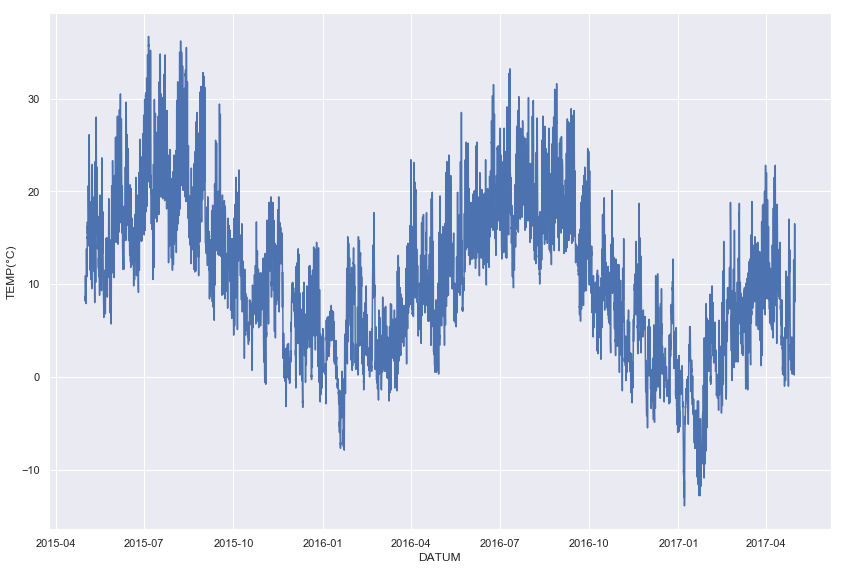

In [58]:
sns.set(rc={"figure.figsize":(14, 9.5)})
time_temp = sns.lineplot(x=weather.index, y="TEMP(°C)", data=weather)

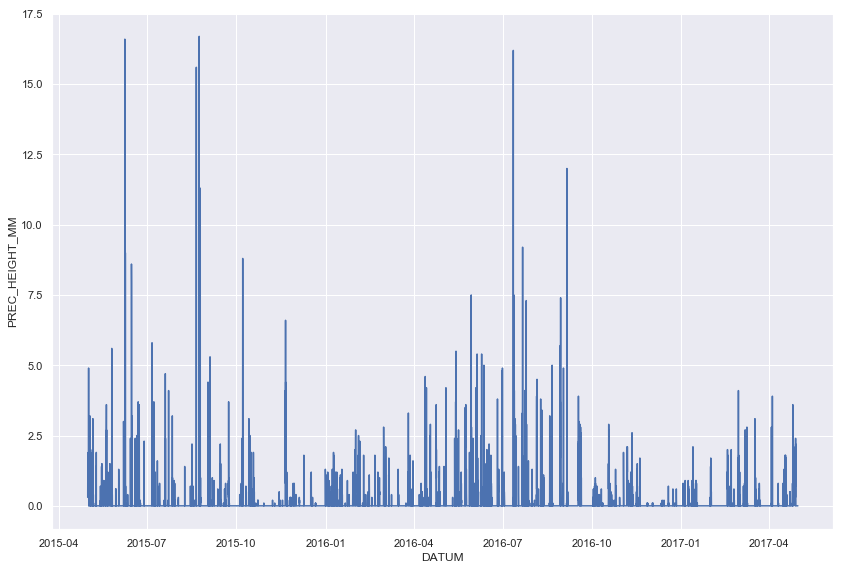

In [59]:
time_prec = sns.lineplot(x=weather.index, y="PREC_HEIGHT_MM", data = weather)

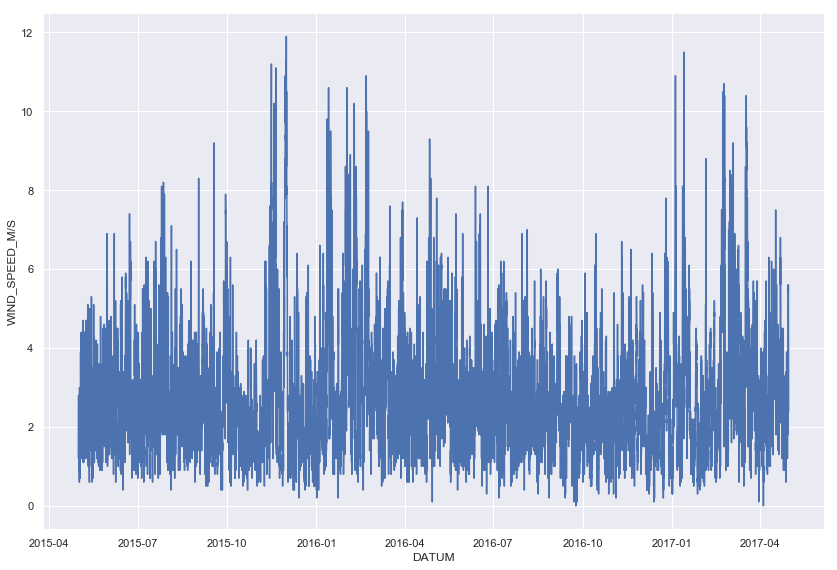

In [60]:
time_wind = sns.lineplot(x=weather.index, y="WIND_SPEED_M/S", data = weather)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000224D259B1D0>,
      dtype=object)

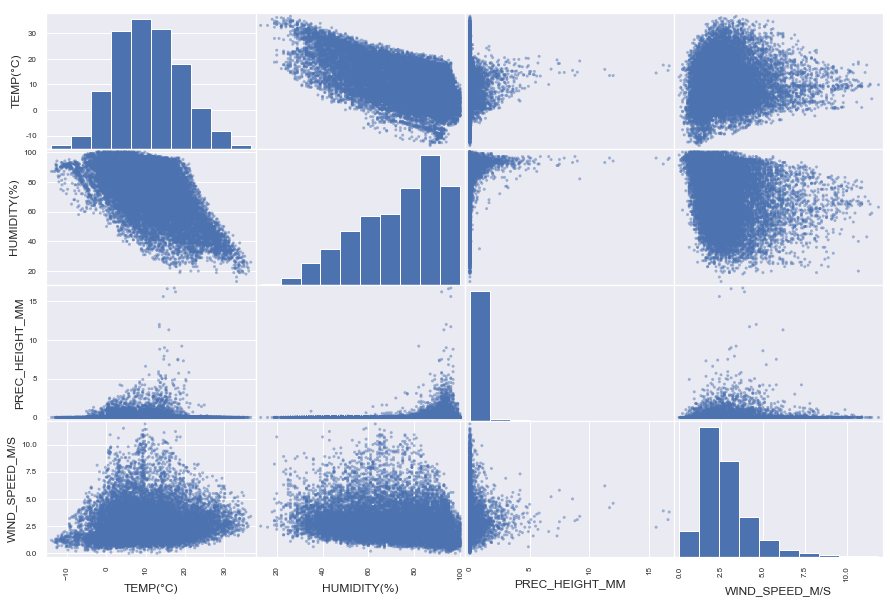

In [61]:
from pandas.plotting import scatter_matrix

attributes = ["TEMP(°C)", "HUMIDITY(%)", "PREC_HEIGHT_MM", "WIND_SPEED_M/S"]
scatter_matrix(weather[attributes], figsize=(15, 10))

In [62]:
dset.head()

BOOKING_HAL_ID  VEHICLE_HAL_ID                           CUSTOMER_HAL_ID  \
0        29434075          107021  D0F36C1ABF3B608012F9F4D00D0EF8C6DA13801A   
1        29433981          107185  6DA7EBF532051C36DEEDC13BA58D5820C06CD099   
2        29434899          106863  9C5A3E80300107E4F867C9D0962FFD79FD724E02   
3        29434432          107524  264660C69328B2FAEF2E901D6E914D46AE648C4B   
4        29434530          107376  1C6F0D912526E8048420EECB89B87B2E664F91C8   

         DATE_BOOKING           DATE_FROM          DATE_UNTIL  \
0 2015-05-01 00:39:30 2015-05-01 00:39:30 2015-05-01 00:49:04   
1 2015-05-01 00:29:56 2015-05-01 00:29:56 2015-05-01 00:35:14   
2 2015-05-01 02:17:58 2015-05-01 02:17:58 2015-05-01 02:20:55   
3 2015-05-01 01:21:04 2015-05-01 01:21:04 2015-05-01 01:38:18   
4 2015-05-01 01:33:02 2015-05-01 01:33:02 2015-05-01 01:44:14   

  START_RENTAL_ZONE  START_RENTAL_ZONE_HAL_ID END_RENTAL_ZONE  \
0               NaN                    4322.0             NaN   
1               NaN                     323.0             NaN   
2               NaN                  117008.0             NaN   
3               NaN                  117008.0             NaN   
4               NaN                   14197.0             NaN   

   END_RENTAL_ZONE_HAL_ID  
0                 16141.0  
1                 43654.0  
2                  6746.0  
3                   437.0  
4                     NaN

In [63]:
# set DATE_BOOKING as index
dset = dset.set_index("DATE_BOOKING")
dset.head(1)

BOOKING_HAL_ID  VEHICLE_HAL_ID  \
DATE_BOOKING                                          
2015-05-01 00:39:30        29434075          107021   

                                              CUSTOMER_HAL_ID  \
DATE_BOOKING                                                    
2015-05-01 00:39:30  D0F36C1ABF3B608012F9F4D00D0EF8C6DA13801A   

                              DATE_FROM          DATE_UNTIL START_RENTAL_ZONE  \
DATE_BOOKING                                                                    
2015-05-01 00:39:30 2015-05-01 00:39:30 2015-05-01 00:49:04               NaN   

                     START_RENTAL_ZONE_HAL_ID END_RENTAL_ZONE  \
DATE_BOOKING                                                    
2015-05-01 00:39:30                    4322.0             NaN   

                     END_RENTAL_ZONE_HAL_ID  
DATE_BOOKING                                 
2015-05-01 00:39:30                 16141.0

In [64]:
#count the bookings per day
dset_daily = dset.resample('D', how={'BOOKING_HAL_ID':'count'})
dset_daily.head(1)

C:\Users\maxha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


BOOKING_HAL_ID
DATE_BOOKING                
2015-05-01               277

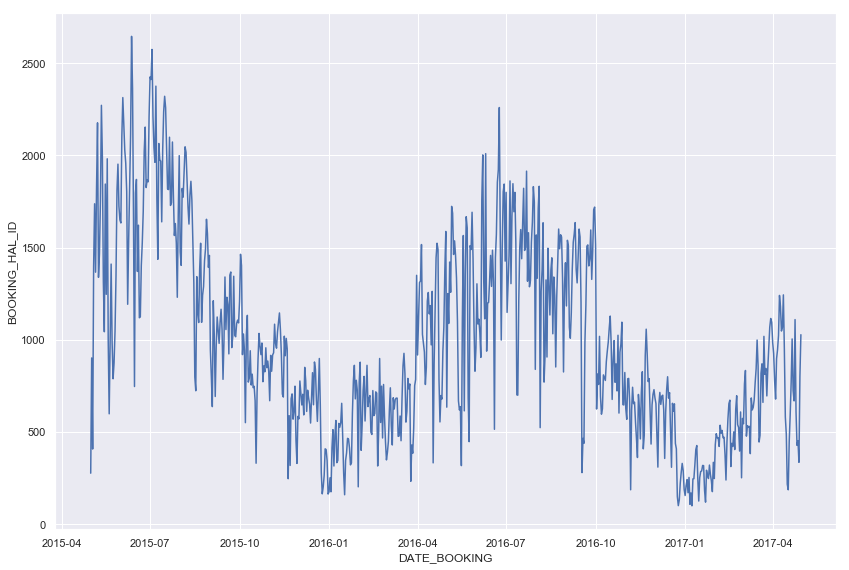

In [65]:
sns.lineplot(x=dset_daily.index, y="BOOKING_HAL_ID",
             data=dset_daily)